In [1]:
from torch.utils.data import Dataset
import torch
from PIL import Image
from torchvision import transforms
from skimage import io
from tqdm import tqdm
import pandas as pd
import numpy as np
import os
import shutil
from torch import nn
import collections

In [45]:
pwd

'/HDD/lg_innotek'

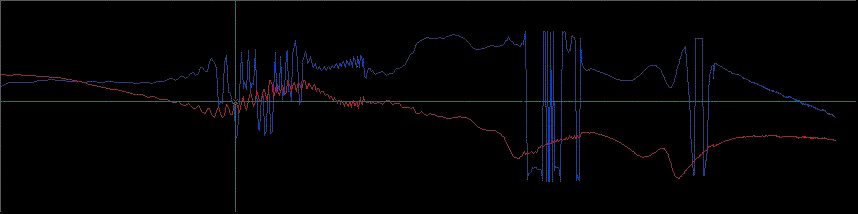

In [46]:
sample1 = Image.open("./DB/raw_data/NG_Test result_11_200813-081131.X_crop_w_filter.jpg")
sample1

In [47]:
sample1.size

(858, 214)

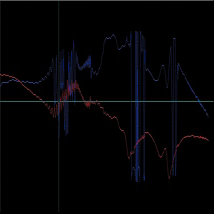

In [48]:
sample1.resize((214,214))

In [49]:
sample1.size

(858, 214)

In [54]:
transform = transforms.Compose([
    transforms.Resize((214,214)),
    transforms.ToTensor(),
])

In [55]:
transform(sample1).shape

torch.Size([3, 214, 214])

In [44]:
for root, _, files in os.walk("./DB/raw_data"):
    print(files[0].split("_"))
    print(files[1].split("_"))
    print(files[2].split("_"))
    print(files[3].split("_"))

['OK', 'Test result', '80', '200813-091255.Z', 'crop.jpg']
['NG', 'Test result', '292', '200813-225520.Y', 'crop', 'w', 'filter.jpg']
['OK', 'Test result', '125', '200813-211459.Z', 'crop', 'w', 'filter.jpg']
['OK', 'Test result', '231', '200813-103702.X', 'crop.jpg']


In [258]:
files = os.listdir("./DB/raw_data")

In [259]:
# look files
files[:5]

['OK_Test result_80_200813-091255.Z_crop.jpg',
 'NG_Test result_292_200813-225520.Y_crop_w_filter.jpg',
 'OK_Test result_125_200813-211459.Z_crop_w_filter.jpg',
 'OK_Test result_231_200813-103702.X_crop.jpg',
 'OK_Test result_57_200813-203122.X_crop_w_filter.jpg']

In [260]:
filter_files = collections.defaultdict(list)
for f in files:
    f_split = f.split("_")
    if f.endswith('.jpg') and ('w' in f_split):
        # " . "   eliminated
        f_split[3] = f_split[3][:-2]
        
        event = ('_').join(f_split[:4])
        filter_files[event].append(f)

In [261]:
# sorted events
for event in filter_files.keys():
    filter_files[event] = sorted(filter_files[event])

In [262]:
# the number of events
len(filter_files)

1660

In [263]:
# example
filter_files['NG_Test result_292_200813-225520']

['NG_Test result_292_200813-225520.X_crop_w_filter.jpg',
 'NG_Test result_292_200813-225520.Y_crop_w_filter.jpg',
 'NG_Test result_292_200813-225520.Z_crop_w_filter.jpg']

In [264]:
# check that there is 3 data in each machine    ->    all machines have 3 data
check_number_data = [len(data) for data in filter_files.values()]
set(check_number_data)

{3}

In [265]:
split_normal_abnormal = collections.defaultdict(list)

for event in filter_files.keys():
    # abnormal
    if event[:2] == 'NG':
        split_normal_abnormal[1].append(filter_files[event] + [1])
    # normal
    else:
        split_normal_abnormal[0].append(filter_files[event] + [0])

In [266]:
len(split_normal_abnormal[1]), len(split_normal_abnormal[0])

(141, 1519)

In [269]:
split_normal_abnormal[1][:2]

[['NG_Test result_292_200813-225520.X_crop_w_filter.jpg',
  'NG_Test result_292_200813-225520.Y_crop_w_filter.jpg',
  'NG_Test result_292_200813-225520.Z_crop_w_filter.jpg',
  1],
 ['NG_Test result_213_200813-215104.X_crop_w_filter.jpg',
  'NG_Test result_213_200813-215104.Y_crop_w_filter.jpg',
  'NG_Test result_213_200813-215104.Z_crop_w_filter.jpg',
  1]]

In [270]:
split_normal_abnormal[0][:2]

[['OK_Test result_125_200813-211459.X_crop_w_filter.jpg',
  'OK_Test result_125_200813-211459.Y_crop_w_filter.jpg',
  'OK_Test result_125_200813-211459.Z_crop_w_filter.jpg',
  0],
 ['OK_Test result_57_200813-203122.X_crop_w_filter.jpg',
  'OK_Test result_57_200813-203122.Y_crop_w_filter.jpg',
  'OK_Test result_57_200813-203122.Z_crop_w_filter.jpg',
  0]]

In [221]:
normal_num, abnormal_num

(1519, 141)

In [251]:
int(abnormal_num * 0.2)

28

In [271]:
import random
a = {'a': [[1,2],[3,4],[4,5],[6,8,9],[3,6,7]], 'b': [5,67,8]}
random.shuffle(a['a'])

In [272]:
a

{'a': [[1, 2], [3, 6, 7], [4, 5], [3, 4], [6, 8, 9]], 'b': [5, 67, 8]}

In [273]:
os.path.split("./DB/raw_data")

('./DB', 'final_data')

In [292]:
import pickle

with open("./DB/train_lg.pkl", "rb") as f:
    normal_data, abnormal_data = pickle.load(f)

In [293]:
len(normal_data)

1491

In [294]:
len(abnormal_data)

113

In [296]:
abnormal_data[:3]

[['NG_Test result_192_200813-095248.X_crop_w_filter.jpg',
  'NG_Test result_192_200813-095248.Y_crop_w_filter.jpg',
  'NG_Test result_192_200813-095248.Z_crop_w_filter.jpg',
  1],
 ['NG_Test result_337_200813-081111.X_crop_w_filter.jpg',
  'NG_Test result_337_200813-081111.Y_crop_w_filter.jpg',
  'NG_Test result_337_200813-081111.Z_crop_w_filter.jpg',
  1],
 ['NG_Test result_842_200813-155523.X_crop_w_filter.jpg',
  'NG_Test result_842_200813-155523.Y_crop_w_filter.jpg',
  'NG_Test result_842_200813-155523.Z_crop_w_filter.jpg',
  1]]

In [297]:
normal_data[:3]

[['OK_Test result_252_200813-223156.X_crop_w_filter.jpg',
  'OK_Test result_252_200813-223156.Y_crop_w_filter.jpg',
  'OK_Test result_252_200813-223156.Z_crop_w_filter.jpg',
  0],
 ['OK_Test result_247_200813-220812.X_crop_w_filter.jpg',
  'OK_Test result_247_200813-220812.Y_crop_w_filter.jpg',
  'OK_Test result_247_200813-220812.Z_crop_w_filter.jpg',
  0],
 ['OK_Test result_11_200813-200152.X_crop_w_filter.jpg',
  'OK_Test result_11_200813-200152.Y_crop_w_filter.jpg',
  'OK_Test result_11_200813-200152.Z_crop_w_filter.jpg',
  0]]

In [298]:
os.path.split("./DB/train_lg.pkl")

('./DB', 'train_lg.pkl')

In [303]:
ag = (abnormal_data + normal_data)

In [305]:
label = [data[-1] for data in ag]

In [308]:
set(label)

{0, 1}

In [19]:
from torch import nn
import numpy as np
import torch.nn.functional as F
import torch
from typing import Dict

class GlobalAvgPool2d(nn.Module):
    """Performs global average pooling over the entire height and width of a batched 2D tensor
    # Arguments
        input: Input tensor
    """
    def forward(self, input):
        return nn.functional.avg_pool2d(input, kernel_size=input.size()[2:]).view(-1, input.size(1))


def conv_block(in_channels: int, out_channels: int) -> nn.Module:
    """Returns a Module that performs 3x3 convolution, ReLu activation, 2x2 max pooling.
    # Arguments
        in_channels:
        out_channels:
    """
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, 3, padding=1),
        nn.BatchNorm2d(out_channels),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )


def feature_extractor(num_input_channels=3) -> nn.Module:
    """Creates afeature extractor as used in LG serial data
    # Arguments:
        num_input_channels: Number of color channels the model expects input data to contain.
    """
    return nn.Sequential(
        conv_block(num_input_channels, 64),
        conv_block(64, 64),
        conv_block(64, 64),
        conv_block(64, 64),
    )

In [20]:
from src.datasets import LGDatasets

data = LGDatasets("./DB/train_lg.pkl")

In [21]:
ex1, ex2, ex3, label = data[0]
ex1.shape

torch.Size([3, 214, 214])

In [22]:
feature_extract =feature_extractor(3)

In [26]:
ex1, ex2, ex3 = ex1.unsqueeze(0), ex2.unsqueeze(0), ex3.unsqueeze(0)

In [27]:
ex1,ex2,ex3 = map(feature_extract, [ex1,ex2,ex3])
ex_cat = torch.cat([ex1,ex2,ex3],dim=0)
ex_cat.shape

torch.Size([3, 64, 13, 13])

In [28]:
global_average = GlobalAvgPool2d()

In [29]:
ex_cat = global_average(ex_cat)

In [30]:
ex_cat.shape

torch.Size([3, 64])